In [1]:
import sys
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# sys.path.insert(0,"..")
from dataloader import dataloader
device = torch.device("cuda")
tmp = dataloader(r"..\data\clover")
imu, rotor, mocap = tmp.runPipeline()
tmp.homogenizeData()
data = tmp.ConcatData
print(device)


  0%|          | 0/1 [00:00<?, ?it/s]

[INFO]  Data folder c:\Users\aniru\Documents\01_UPenn\04_ESE6500\02_Homework\05_Project\DeepIO\data\clover\yawConstant\New folder\rosbag already exists. Not creating.


100%|██████████| 1/1 [00:12<00:00, 12.20s/it]


cuda


In [2]:
data


,angular_velocity.x,angular_velocity.y,angular_velocity.z,linear_acceleration.x,linear_acceleration.y,linear_acceleration.z,rpm_0,rpm_1,rpm_2,rpm_3,...,pose.position.y,pose.position.z,pose.orientation.x,pose.orientation.y,pose.orientation.z,pose.orientation.w,psi,theta,phi,Time
0,-0.007151,-0.000807,-0.004281,-0.056772,0.077776,-9.752679,0.0,0.0,0.0,0.0,...,0.384584,-0.770876,-0.000062,0.009564,-0.004300,0.999945,1.564687,0.023023,-0.004153,1.533762e+09
1,-0.007151,-0.000807,-0.004281,-0.056772,0.077776,-9.752679,0.0,0.0,0.0,0.0,...,0.384638,-0.771035,-0.000914,0.009194,-0.004341,0.999948,1.562096,0.018379,-0.001908,1.533762e+09
2,-0.007151,-0.000807,-0.004281,-0.056772,0.077776,-9.752679,0.0,0.0,0.0,0.0,...,0.384729,-0.771159,-0.001298,0.009401,-0.004191,0.999946,1.562389,0.018791,-0.002676,1.533762e+09
3,-0.007151,-0.000807,-0.004281,-0.056772,0.077776,-9.752679,0.0,0.0,0.0,0.0,...,0.384642,-0.771133,-0.001172,0.009438,-0.004223,0.999946,1.562328,0.018867,-0.002425,1.533762e+09
4,-0.007151,-0.000807,-0.004281,-0.056772,0.077776,-9.752679,0.0,0.0,0.0,0.0,...,0.384542,-0.770958,-0.000450,0.010039,-0.004201,0.999941,1.562385,0.020076,-0.000986,1.533762e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191786,-0.008219,-0.000583,-0.004718,-0.048577,-0.155148,-9.754776,0.0,0.0,0.0,0.0,...,0.272819,-0.767970,0.001084,0.027518,-0.046078,0.998558,1.474877,0.053929,0.000696,1.533763e+09
191787,-0.008119,-0.000752,-0.004880,-0.048405,-0.158045,-9.757049,0.0,0.0,0.0,0.0,...,0.272808,-0.767991,0.001083,0.027403,-0.046056,0.998562,1.474924,0.053704,0.000701,1.533763e+09
191788,-0.008119,-0.000752,-0.004880,-0.048405,-0.158045,-9.757049,0.0,0.0,0.0,0.0,...,0.272797,-0.768012,0.001082,0.027288,-0.046034,0.998566,1.474972,0.053479,0.000706,1.533763e+09
191789,-0.008119,-0.000752,-0.004880,-0.048405,-0.158045,-9.757049,0.0,0.0,0.0,0.0,...,0.272797,-0.768012,0.001082,0.027288,-0.046034,0.998566,1.474972,0.053479,0.000706,1.533763e+09


In [3]:
data['g_x'] = 0.0
data['g_y'] = 0.0
data['g_z'] = -9.81


In [4]:
sensor_readings = data[['linear_acceleration.x', 'linear_acceleration.y', 'linear_acceleration.z',
                        'angular_velocity.x', 'angular_velocity.y', 'angular_velocity.z', 'g_x', 'g_y', 'g_z']].to_numpy()
sensor_readings = torch.tensor(sensor_readings, device=device)
sensor_readings


tensor([[-0.0568,  0.0778, -9.7527,  ...,  0.0000,  0.0000, -9.8100],
        [-0.0568,  0.0778, -9.7527,  ...,  0.0000,  0.0000, -9.8100],
        [-0.0568,  0.0778, -9.7527,  ...,  0.0000,  0.0000, -9.8100],
        ...,
        [-0.0484, -0.1580, -9.7570,  ...,  0.0000,  0.0000, -9.8100],
        [-0.0484, -0.1580, -9.7570,  ...,  0.0000,  0.0000, -9.8100],
        [-0.0484, -0.1580, -9.7570,  ...,  0.0000,  0.0000, -9.8100]],
       device='cuda:0', dtype=torch.float64)

In [5]:
sensor_readings.shape


torch.Size([191791, 9])

In [6]:
eulers = data[['phi', 'theta', 'psi']].to_numpy()
eulers = torch.tensor(eulers, device=device)
eulers


tensor([[-4.1528e-03,  2.3023e-02,  1.5647e+00],
        [-1.9078e-03,  1.8379e-02,  1.5621e+00],
        [-2.6762e-03,  1.8791e-02,  1.5624e+00],
        ...,
        [ 7.0606e-04,  5.3479e-02,  1.4750e+00],
        [ 7.0606e-04,  5.3479e-02,  1.4750e+00],
        [ 7.0606e-04,  5.3479e-02,  1.4750e+00]], device='cuda:0',
       dtype=torch.float64)

In [7]:
class euler_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(9, 30, dtype=torch.float64)
        self.layer2 = nn.Linear(30, 30, dtype=torch.float64)
        self.layer3 = nn.Linear(30, 3, dtype=torch.float64)
        self.tanh = nn.Tanh()

    def forward(self, sensor_reading):
        x = self.tanh(self.layer1(sensor_reading))
        x = self.tanh(self.layer2(x))
        x = self.layer3(x)
        return x


In [8]:
EulerModel = euler_model().to(device)


In [10]:
lr = 0.01
dataset = torch.utils.data.TensorDataset(sensor_readings, eulers)
train_set, test_set = torch.utils.data.random_split(
    dataset, [int(0.8*len(dataset)), len(dataset)-int(0.8*len(dataset))])
optimizer = torch.optim.Adam(EulerModel.parameters(), lr=lr)
dataloader = torch.utils.data.DataLoader(
    train_set, batch_size=10000, shuffle=True)
loss_fn = nn.MSELoss()
losses = []

epoch_num = 1000

for epoch in range(epoch_num):
    for batch in dataloader:
        sensor_reading, euler = batch
        prediction = EulerModel(sensor_readings)
        loss = loss_fn(prediction, eulers)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")

fig = plt.figure()
plt.plot(losses)
plt.show()


Epoch: 0, Loss: 0.01308921667214349


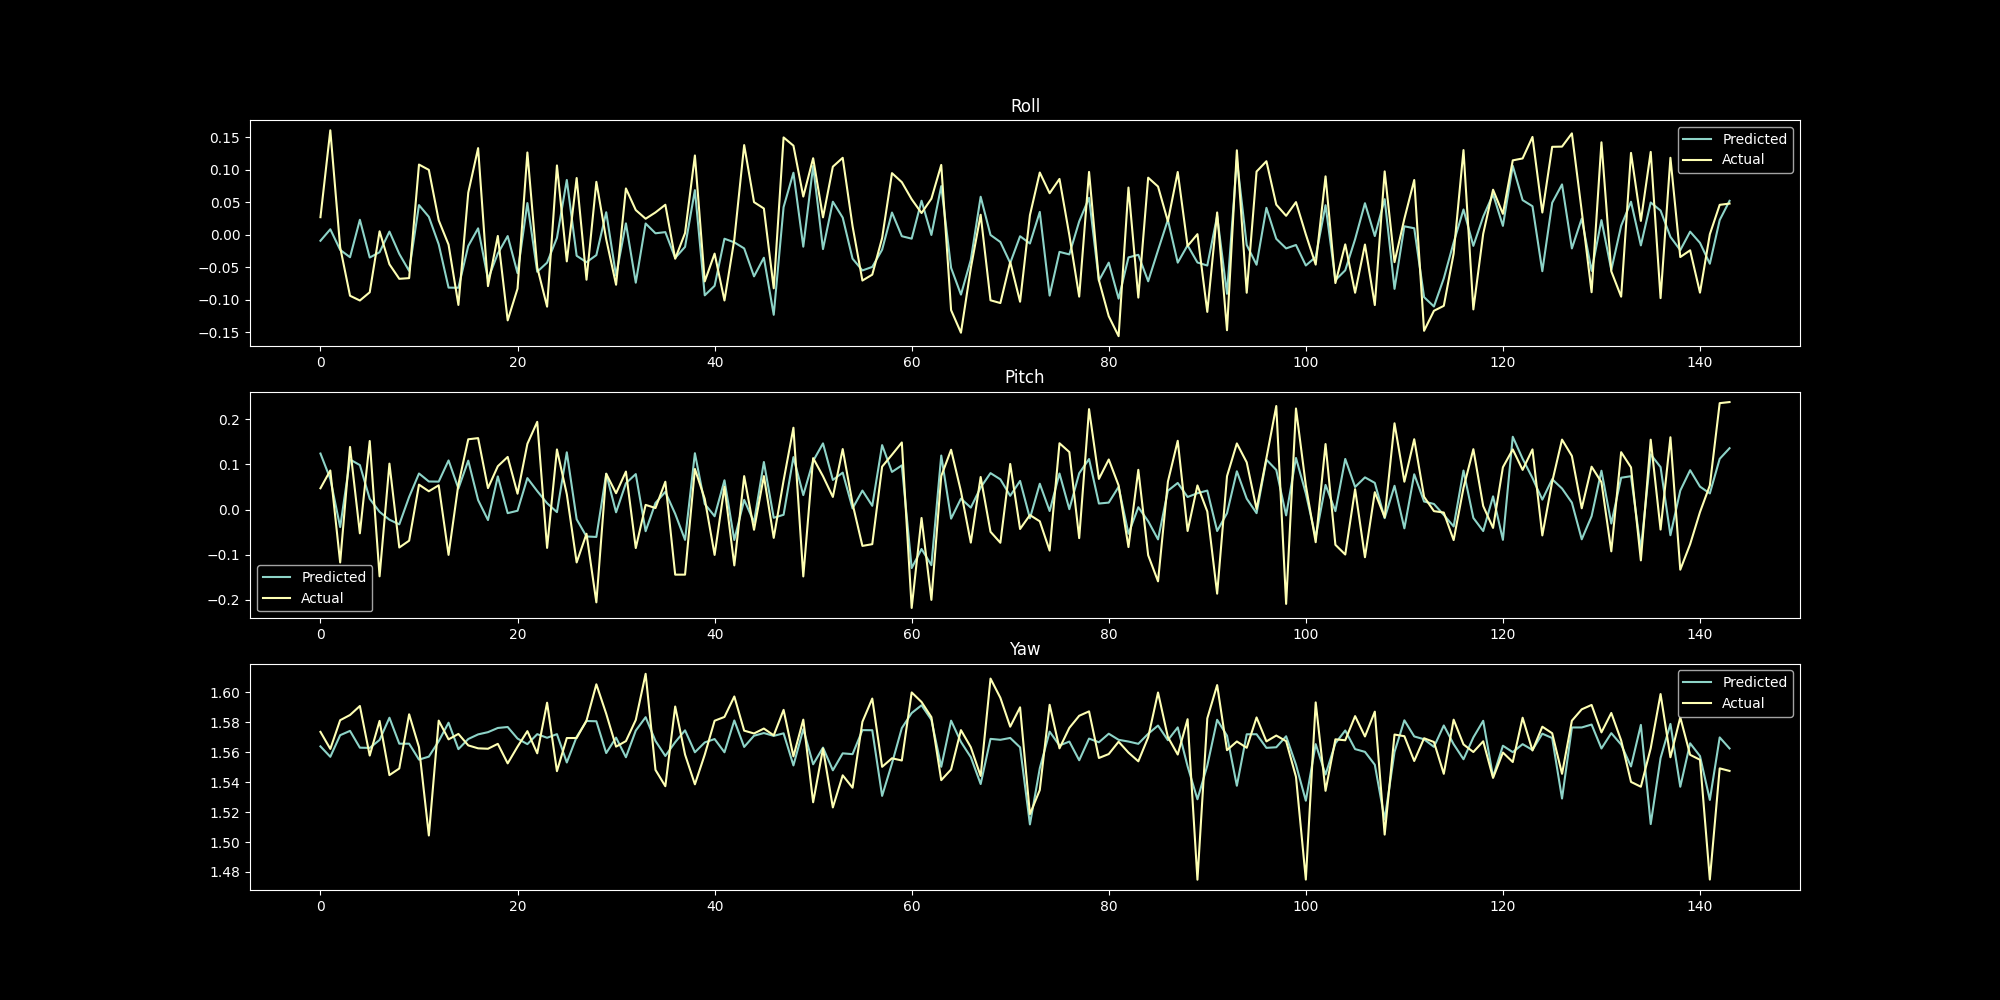

In [ ]:
%matplotlib widget
EulerModel.eval()
# sensor_readings, eulers = test_set[:]
with torch.no_grad():
    prediction = EulerModel(sensor_readings)

fig, axs = plt.subplots(3, 1, figsize=(20, 10))

axs[0].plot(prediction[:, 0].cpu().numpy(), label='Predicted')
axs[0].plot(eulers[:, 0].cpu().numpy(), label='Actual')
axs[0].set_title('Roll')
axs[0].legend()

axs[1].plot(prediction[:, 1].cpu().numpy(), label='Predicted')
axs[1].plot(eulers[:, 1].cpu().numpy(), label='Actual')
axs[1].set_title('Pitch')
axs[1].legend()

axs[2].plot(prediction[:, 2].cpu().numpy(), label='Predicted')
axs[2].plot(eulers[:, 2].cpu().numpy(), label='Actual')
axs[2].set_title('Yaw')
axs[2].legend()

plt.show()


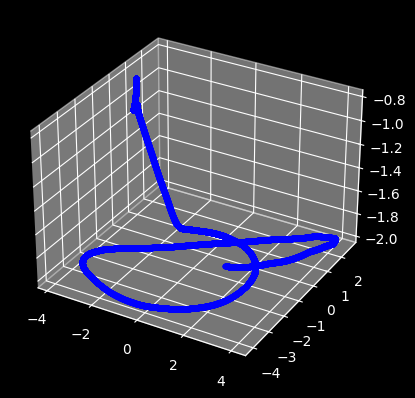

In [ ]:
# import matplotlib.pyplot as plt


# x1, y1, z1 = data['pose.position.x'].to_numpy(
# ), data['pose.position.y'].to_numpy(), data['pose.position.z'].to_numpy()
# xA1, yA1, zA1 = data['psi'].to_numpy(
# ), data['theta'].to_numpy(), data['phi'].to_numpy()
# dt = np.append(0, np.diff(data['Time'].to_numpy()))
# r1, r2, r3, r4 = data['rpm_0'].to_numpy(), data['rpm_1'].to_numpy(
# ), data['rpm_2'].to_numpy(), data['rpm_3'].to_numpy()


# TrajectorySize = 25000  # 15*350
# TrainTrajectorySize = int(0.8*TrajectorySize)
# St = 0  # Start index


# xTrain = np.stack((r1[St:St + TrajectorySize], r2[St:St + TrajectorySize],
#                   r3[St:St + TrajectorySize], r4[St:St + TrajectorySize], dt[St:St + TrajectorySize]), axis=1)
# yTrain = np.stack((x1[St:St + TrajectorySize], y1[St:St + TrajectorySize], z1[St:St + TrajectorySize],
#                    xA1[St:St + TrajectorySize], yA1[St:St + TrajectorySize], zA1[St:St + TrajectorySize]), axis=1)


# # torch.tensor(xTrain[:7000], dtype=torch.float32)
# train_x = xTrain[:TrainTrajectorySize]
# # torch.tensor(yTrain[:7000], dtype=torch.float32)
# train_y = yTrain[:TrainTrajectorySize]
# # torch.tensor(xTrain[7000:], dtype=torch.float32)
# test_x = xTrain[TrainTrajectorySize:]
# # torch.tensor(yTrain[7000:], dtype=torch.float32)
# test_y = yTrain[TrainTrajectorySize:]

# xTrain = torch.tensor(xTrain, device=device)
# yTrain = torch.tensor(yTrain, device=device)
# train_x = torch.tensor(train_x, device=device)
# train_y = torch.tensor(train_y, device=device)
# test_x = torch.tensor(test_x, device=device)
# test_y = torch.tensor(test_y, device=device)

# ax = plt.figure().add_subplot(projection='3d')
# ax.plot(train_y[:, 0].cpu().numpy(), train_y[:, 1].cpu(
# ).numpy(), train_y[:, 2].cpu().numpy(), '.b')


In [ ]:
# #### NODE #####

# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchdiffeq import odeint_adjoint as odeint
# import numpy as np
# import matplotlib.pyplot as plt

# method = 'dopri5'
# batch_time = 45
# batch_size = TrainTrajectorySize-100
# niters = 200000
# test_freq = 10000
# viz = 'store_true'
# adjoint = 'store_true'


# # def mini_batch(yTrain, xTrain, size, batch_size, batch_time):

# #     s = torch.from_numpy(np.random.choice(
# #         np.arange(size-batch_time, dtype=np.int64), batch_size, replace=False))
# #     batch_y0 = xTrain[s, :4]
# #     batch_x = xTrain[:batch_time, 4]
# #     batch_y = torch.stack([torch.Tensor(xTrain[s + i, :4])
# #                           for i in range(batch_time)], dim=0)
# #     batch_yy = yTrain[s, :]
# #     batch_yy1 = yTrain[s+1, :]

# #     return batch_y0, batch_x, batch_y, batch_yy, batch_yy1

# def mini_batch(yTrain, xTrain, size, batch_size, batch_time):
#     device = torch.device("cuda")
#     s = torch.randint(0, size-batch_time, (batch_size,),
#                       dtype=torch.int64, device=device)
#     batch_y0 = xTrain[s, :4]
#     batch_x = xTrain[:batch_time, 4]
#     batch_y = torch.stack([xTrain[s + i, :4]
#                           for i in range(batch_time)], dim=0)
#     batch_yy = yTrain[s, :]
#     batch_yy1 = yTrain[s+1, :]

#     return batch_y0, batch_x, batch_y, batch_yy, batch_yy1

# # def TrainNODENetwork(yTrain, xTrain, size, batch_size, batch_time, FuncControl, FuncDynamics, niters=13000,):

# #     parameters = list(FuncControl.parameters()) + \
# #         list(FuncDynamics.parameters())
# #     # optimizerD = optim.Adam(params=parameters, lr=1e-3)
# #     optimizer = optim.Adadelta(
# #         params=parameters, lr=1, rho=0.9, eps=1e-06, weight_decay=0)

# #     for itr in range(1, niters + 1):
# #         optimizer.zero_grad()
# #         batch_y0, batch_x, batch_y, batch_yy, batch_yy1 = mini_batch(
# #             yTrain, xTrain, size, batch_size, batch_time)
# #         # pred_y = odeint(FuncControl, torch.Tensor(
# #             # batch_y0).to(device = 'cuda:0'), torch.Tensor(batch_x))

# #         XDynamics = torch.cat((batch_y0, batch_yy), 1).to(
# #             device='cuda:0')  # pred_y[1,:,:]
# #         pred_yy = FuncDynamics(XDynamics).to(device='cuda:0', dtype=torch.float64)
# #         lossD = torch.mean(
# #             torch.abs(pred_yy - batch_yy1))
# #         # lossC = torch.mean(torch.abs(pred_y - torch.Tensor(batch_y)))

# #         loss = lossD  # + lossC
# #         loss.backward()
# #         optimizer.step()

# #         if itr % test_freq == 0:
# #             '''with torch.no_grad():
# #                 pred_y = odeint(Func, torch.Tensor(y0[1,:]), t)
# #                 loss = torch.norm(pred_y - torch.Tensor(y[:,1,:]))'''
# #             print('Iter {:04d} | Total Loss {:.6f}'.format(itr, loss.item()))

# #     return FuncControl, FuncDynamics


# class ODEFunc(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.net = nn.Sequential(
#             nn.Linear(4, 30),
#             nn.ReLU(),
#             nn.Linear(30, 30),
#             nn.ReLU(),
#             nn.Linear(30, 4),
#         )
#         self.net = self.net.float()
#         self.net.apply(self._apply_wt_init)

#     def forward(self, t, y):
#         return self.net(y)

#     def _apply_wt_init(self, layer):
#         if isinstance(layer, nn.Linear):
#             nn.init.normal_(layer.weight, mean=0, std=0.1)
#             nn.init.constant_(layer.bias, val=0)


# class Func2(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.net = nn.Sequential(
#             # nn.BatchNorm1d(10),
#             nn.Linear(10, 175),
#             nn.LeakyReLU(),
#             nn.BatchNorm1d(175),
#             nn.Linear(175, 35),
#             nn.LeakyReLU(),
#             nn.BatchNorm1d(35),
#             nn.Linear(35, 6),
#         )
#         self.net = self.net.to(dtype=torch.float64)
#         self.net.apply(self._apply_wt_init)

#     def forward(self, y):
#         return self.net(y)

#     def _apply_wt_init(self, layer):
#         if isinstance(layer, nn.Linear):
#             nn.init.normal_(layer.weight, mean=0, std=0.1)
#             nn.init.constant_(layer.bias, val=0)


# FuncControl = ODEFunc().to(device=device)
# FuncDynamics = Func2().to(device=device)

# train_y = torch.tensor(train_y, device=device)
# train_x = torch.tensor(train_x, device=device)


# # FuncControl, FuncDynamics = TrainNODENetwork(
# #     train_y, train_x, TrainTrajectorySize, batch_size, batch_time, FuncControl, FuncDynamics)


C:\Users\aniru\AppData\Local\Temp\ipykernel_2852\3046507071.py:130: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_y = torch.tensor(train_y, device=device)
C:\Users\aniru\AppData\Local\Temp\ipykernel_2852\3046507071.py:131: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_x = torch.tensor(train_x, device=device)


In [ ]:
# parameters = list(FuncControl.parameters()) + list(FuncDynamics.parameters())
# optimizer = optim.Adadelta(params=parameters, lr=0.1,
#                            rho=0.9, eps=1e-06, weight_decay=0)

# batchy0s = []
# batchxs = []
# batchys = []
# batchyys = []
# batchyy1s = []

# # for itr in range(1, niters + 1):
# #     batch_y0, batch_x, batch_y, batch_yy, batch_yy1 = mini_batch(
# #         yTrain, xTrain, TrainTrajectorySize, batch_size, batch_time)
# #     batchy0s.append(batch_y0)
# #     batchxs.append(batch_x)
# #     batchys.append(batch_y)
# #     batchyys.append(batch_yy)
# #     batchyy1s.append(batch_yy1)
# niters = 5000
# test_freq = 1000
# for itr in range(1, niters + 1):
#     optimizer.zero_grad()
#     # batch_y0 = batchy0s[itr-1]
#     # batch_x = batchxs[itr-1]
#     # batch_y = batchys[itr-1]
#     # batch_yy = batchyys[itr-1]
#     # batch_yy1 = batchyy1s[itr-1]

#     batch_y0, batch_x, batch_y, batch_yy, batch_yy1 = mini_batch(
#         yTrain, xTrain, TrainTrajectorySize, batch_size, batch_time)

#     XDynamics = torch.cat([batch_y0, batch_yy], dim=1)
#     pred_yy = FuncDynamics(XDynamics)
#     loss = torch.mean(torch.abs(pred_yy - batch_yy1))

#     loss.backward()
#     optimizer.step()

#     if itr % test_freq == 0:
#         print('Iter {:04d} | Total Loss {:.6f}'.format(itr, loss.item()))


Iter 1000 | Total Loss 0.366187
Iter 2000 | Total Loss 0.305723
Iter 3000 | Total Loss 0.203329
Iter 4000 | Total Loss 0.143418
Iter 5000 | Total Loss 0.107935


In [ ]:
# from copy import deepcopy


In tensor([-3.4840,  0.3846, -0.7709,  1.5647,  0.0230, -0.0042], device='cuda:0',
       dtype=torch.float64)
Out: [-3.3624747   0.09309628 -0.85974415  1.53933214 -0.05362345 -0.023037  ]
In tensor([-3.3625,  0.0931, -0.8597,  1.5393, -0.0536, -0.0230], device='cuda:0',
       dtype=torch.float64, grad_fn=<ReshapeAliasBackward0>)
Out: [-3.34143691  0.03729316 -0.86300494  1.52012264 -0.03832653 -0.00414114]
In tensor([-3.3414,  0.0373, -0.8630,  1.5201, -0.0383, -0.0041], device='cuda:0',
       dtype=torch.float64, grad_fn=<ReshapeAliasBackward0>)
Out: [-3.33736343e+00  2.52690498e-02 -8.63534764e-01  1.51671179e+00
 -3.56149882e-02 -8.82667688e-04]
In tensor([-3.3374e+00,  2.5269e-02, -8.6353e-01,  1.5167e+00, -3.5615e-02,
        -8.8267e-04], device='cuda:0', dtype=torch.float64,
       grad_fn=<ReshapeAliasBackward0>)
Out: [-3.33650470e+00  2.27199571e-02 -8.63644483e-01  1.51600027e+00
 -3.50463255e-02 -2.00160657e-04]
In tensor([-3.3365e+00,  2.2720e-02, -8.6364e-01,  1.5160e+

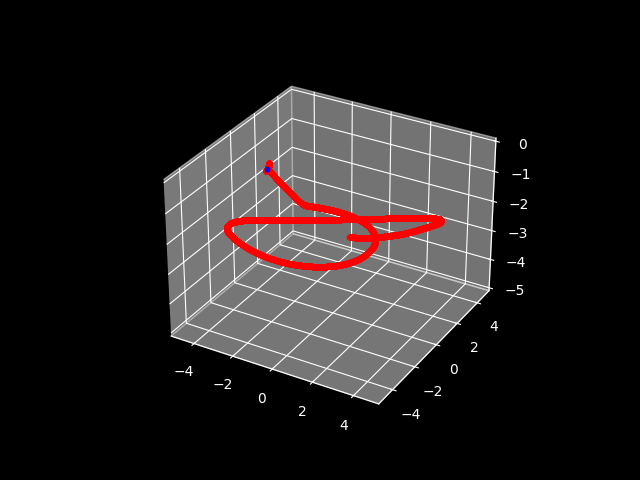

In [ ]:
# %matplotlib widget
# ax = plt.figure().add_subplot(projection='3d')
# ax.plot(train_y[::2, 0].cpu().detach().numpy(), train_y[::2, 1].cpu(
# ).detach().numpy(), train_y[::2, 2].cpu().detach().numpy(), '.r')

# y0 = train_y[0, :]
# u0 = train_x[0, :4]
# FuncDynamics.eval()
# x = []
# y = []
# z = []
# for i in range(TrainTrajectorySize):

#     # pred_u = odeint(FuncControl, torch.Tensor(u0), torch.Tensor(train_x[i:i+5,4]))

#     u0 = train_x[i, :4]  # pred_u[1,:].detach().numpy()
#     if i % 500 == 0:
#         m = deepcopy(train_y[i, :])

#         # m[0] += (np.random.uniform()-0.5)
#         # m[1] += (np.random.uniform()-0.5)
#         # m[2] += (np.random.uniform()-0.5)
#     else:
#         m = pred_y
#     # print("In",m)
#     XDynamics = torch.cat(
#         (torch.Tensor(u0), torch.Tensor(m).to(device='cuda:0'))).to(device='cuda:0').unsqueeze(0)
#     pred_y = FuncDynamics(XDynamics).flatten()
#     y0 = pred_y.to('cpu').detach().numpy()
#     # print("Out:", y0)
#     # if i == 5:
#     #     break
#     x.append(y0[0])
#     y.append(y0[1])
#     z.append(y0[2])

# ax.scatter(x[0::2], y[::2], z[::2], s=8, c='b')
# plt.xlim([-5, 5])
# plt.ylim([-5, 5])
# plt.gca().set_zlim([-5, 0])
# plt.show()


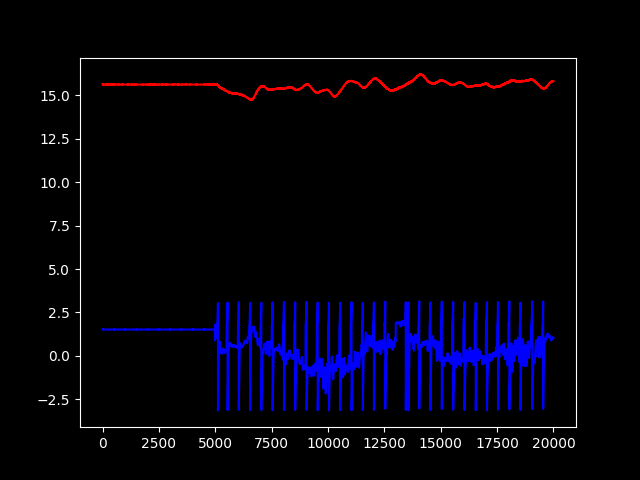

In [ ]:
# %matplotlib widget
# plt.figure()
# xt = []
# yt = []
# zt = []

# y0 = train_y[0, :]
# u0 = train_x[0, :4]
# FuncDynamics.eval()
# x = []
# y = []
# z = []
# for i in range(TrainTrajectorySize):

#     # pred_u = odeint(FuncControl, torch.Tensor(u0), torch.Tensor(train_x[i:i+5,4]))

#     u0 = train_x[i, :4]  # pred_u[1,:].detach().numpy()
#     if i % 500 == 0:
#         m = deepcopy(train_y[i, :])

#         # m[0] += (np.random.uniform()-0.5)
#         # m[1] += (np.random.uniform()-0.5)
#         # m[2] += (np.random.uniform()-0.5)
#     else:
#         m = pred_y
#     # print("In",m)
#     XDynamics = torch.cat(
#         (torch.Tensor(u0), torch.Tensor(m).to(device='cuda:0'))).to(device='cuda:0').unsqueeze(0)
#     pred_y = FuncDynamics(XDynamics).flatten()
#     y0 = pred_y.to('cpu').detach().numpy()
#     y0[3:] = np.arctan2(np.sin(y0[3:]), np.cos(y0[3:]))
#     # print("Out:", y0)
#     # if i == 5:
#     #     break
#     x.append(y0[3])
#     y.append(y0[4])
#     z.append(y0[5])
#     xt.append(train_y[i, 3].cpu().detach().numpy())
#     yt.append(train_y[i, 4].cpu().detach().numpy())
#     zt.append(train_y[i, 5].cpu().detach().numpy())

# plt.plot(np.array(xt)*10, 'r')
# plt.plot(x, 'b')


# plt.show()


In [ ]:
# plt.figure()
# plt.plot(yt, 'r')
# plt.plot(y, 'b')
# plt.show()


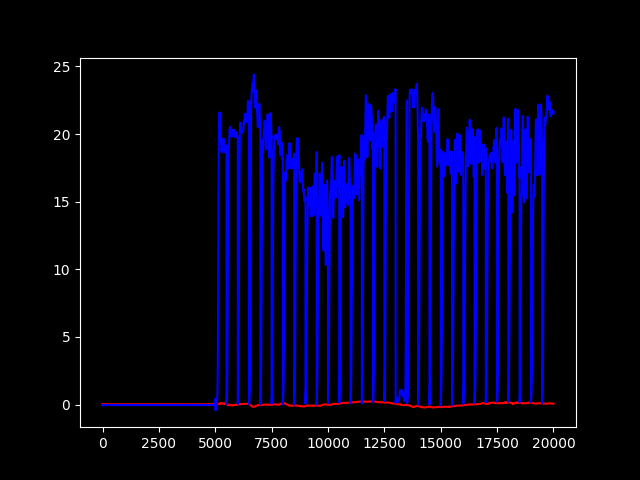

In [ ]:
# plt.figure()
# plt.plot(yt, 'r')
# plt.plot(y, 'b')
# plt.show()


In [ ]:
# torch.save(FuncDynamics.state_dict(), 'FuncDynamics2.pt')


In [ ]:
# loadModel = Func2().to(device=device)


In [ ]:
# loadModel.load_state_dict(torch.load('FuncDynamics.pt'))


<All keys matched successfully>

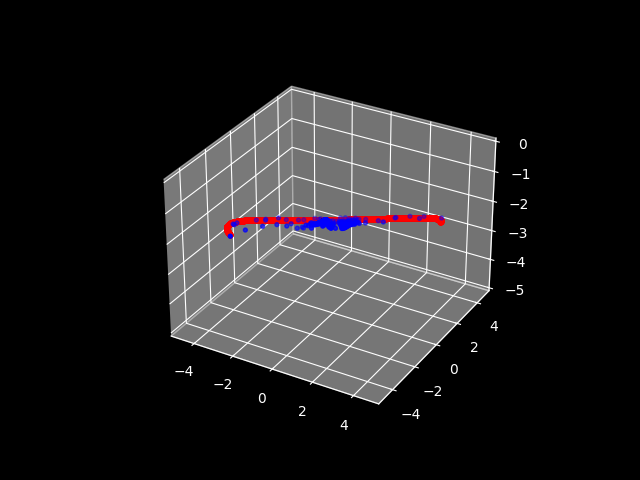

In [ ]:
# loadModel.eval()
# ax = plt.figure().add_subplot(projection='3d')
# ax.plot(train_y[::2, 0].cpu().detach().numpy(), train_y[::2, 1].cpu(
# ).detach().numpy(), train_y[::2, 2].cpu().detach().numpy(), '.r')

# y0 = train_y[0, :]
# u0 = train_x[0, :4]
# FuncDynamics.eval()
# x = []
# y = []
# z = []
# for i in range(TrainTrajectorySize):

#     # pred_u = odeint(FuncControl, torch.Tensor(u0), torch.Tensor(train_x[i:i+5,4]))
#     u0 = train_x[i, :4]  # pred_u[1,:].detach().numpy()
#     m = deepcopy(train_y[i, :])
#     m[0] += (np.random.uniform()-0.5)*3
#     m[1] += (np.random.uniform()-0.5)*3
#     m[2] += (np.random.uniform()-0.5)*3
#     XDynamics = torch.cat(
#         (torch.Tensor(u0), torch.Tensor(m).to(device='cuda:0'))).to(device='cuda:0').unsqueeze(0)
#     pred_y = loadModel(XDynamics).flatten()
#     y0 = pred_y.to('cpu').detach().numpy()
#     x.append(y0[0])
#     y.append(y0[1])
#     z.append(y0[2])

# ax.scatter(x[0::2], y[::2], z[::2], s=8, c='b')
# plt.xlim([-5, 5])
# plt.ylim([-5, 5])
# plt.gca().set_zlim([-5, 0])
# plt.show()
